In [30]:
import numpy as np 
import pandas as pd 
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeClassifier as DTC 
from sklearn import metrics
import matplotlib.pyplot as plt
df = pd.read_csv('result.csv')
# cols_drop = []
# for col in df.columns.values:
#     if df[col].isnull().sum()/ 480.0 > 0.5:
#         cols_drop.append(col)
# df = df.drop(cols_drop, axis=1)
# print(df)
df = df.fillna(0)
region = df.region_name.unique()

def split_region(i):
    val_state = np.array([region[3*i], region[3*i+1], region[3*i+2]])
    train = df.loc[~np.in1d(df['region_name'], val_state)]
    val = df.loc[np.in1d(df['region_name'], val_state)]
    return (train, val)

time_train = df.loc[df['date'] < '2020-08-10']
time_val = df.loc[df['date'] >= '2020-08-10']


In [31]:
from math import sqrt

score_list = []
for k in range(1,200):
    score = 0
    train, val = split_region(2)
    x_train = train.iloc[:,2:-1]
    y_train = train.iloc[:, -1]
    x_val = val.iloc[:,2:-1]
    y_val = val.iloc[:,-1]
    neigh = KNN(k)
    neigh.fit(x_train, y_train)
    y_pred = neigh.predict(x_val)
    print(y_val.values - y_pred)
    score_list.append(sqrt(metrics.mean_absolute_error(y_val,y_pred)))





774e+01 -1.66021505e+01
 -9.88709677e+00 -6.77419355e-01 -4.87096774e+00 -1.11774194e+01
 -5.76344086e+00  3.55913978e+00  1.23655914e+00  2.33333333e+00
  1.70430108e+00  3.70430108e+00 -1.47311828e+00 -1.01612903e+00
 -3.83333333e+00  2.24193548e+00 -8.29569892e+00 -3.65591398e-01
  1.20268817e+01  1.32688172e+01  1.40483871e+01  2.19462366e+01
  2.66344086e+01  2.58655914e+01  2.48870968e+01  3.69032258e+01
  2.58279570e+01  2.73655914e+01  6.25376344e+01  7.39247312e+01
 -4.51720430e+01 -4.52526882e+01 -4.64086022e+01 -4.63172043e+01
 -4.71720430e+01 -4.71720430e+01 -4.68709677e+01 -4.68709677e+01
 -4.68709677e+01 -4.70752688e+01 -4.71720430e+01 -4.71720430e+01
 -4.64086022e+01  8.81129032e+02  9.51290323e+01  9.51290323e+01
  5.61290323e+01  6.12903226e+00  6.68279570e+00  1.35913978e+01
  3.96827957e+01  1.55913978e+01  3.91290323e+01  1.20827957e+02
 -2.24086022e+01  3.86827957e+01  2.61290323e+01  2.56827957e+01
  1.06827957e+01  3.86827957e+01]
[-1.96898396e+01 -1.84171123e+01

In [23]:
print(min(score_list))
print(score_list)

97.76722735297605
[100.27811326505899, 100.85089378769916, 99.047488298652, 98.11277878600275, 100.63552719260399, 99.88017203345265, 100.65627621287747, 100.46999016428295, 100.91858892801093, 102.57704746514527, 102.83922254323299, 103.05938709558932, 103.4630060582849, 102.80482576001228, 102.44129110596366, 102.50047764116354, 102.29014112774442, 102.33896865892697, 102.36509879002901, 102.10796723185818, 101.53906059445615, 101.32479778644834, 101.47472186039025, 101.20006189230406, 101.01479909179425, 101.18020829015126, 100.84367509610702, 100.85242489470868, 100.22774225274574, 100.47333962454242, 99.93236352959174, 100.18785209527789, 100.208700748709, 99.99178287077534, 99.85356030542394, 99.67011611975329, 99.83853891544933, 99.70200686997059, 99.79479098036977, 99.61171990812906, 99.62216421633427, 99.59228322163855, 99.42527230312083, 99.28766835315666, 99.19810960520135, 99.13824591545185, 99.3099158612107, 99.12071248881398, 98.9874546985605, 98.80101301774862, 98.678462

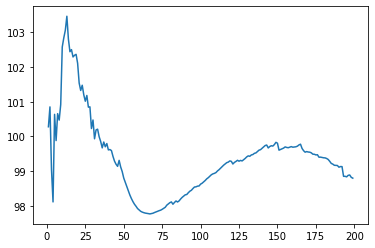

In [24]:
plt.plot(range(1,200),score_list)